In [9]:
%run common.ipynb

In [24]:
# Parameters
# Chose variables to create the model
input_cols = ['shape', 'profile_entrance', 'profile_exit', 'rising_entrance', 'rising_exit', 'shards', 'feathering', 'entrance_mounding', 'center_mounding', 'exit_mounding']
result_col = 'result'
# Load the train and the validation datasets for blade class prediction
train_dataset_file = 'DATA/Train/blade_prediction_train.xlsx'
test_dataset_file = 'DATA/Validation/blade_prediction_validation.xlsx'

In [28]:
# The data are displayed on a table
display_input_data(
    train_dataset_file,
    input_cols
)

,shape_E,shape_indeterminate,profile_entrance_V,profile_exit_V,rising_entrance_bilateral,rising_entrance_single,rising_exit_bilateral,rising_exit_single,shards_present,feathering_present,entrance_mounding_bilateral,entrance_mounding_single,center_mounding_bilateral,center_mounding_single,exit_mounding_bilateral,exit_mounding_single
0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1
1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1
2,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
3,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
4,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1
276,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
277,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
278,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
# The two datasets are tested for compatibility 
check_input_data_indices(train_dataset_file, test_dataset_file, input_cols)

Datasets are compatible


In [26]:
# Logistic regression model
model = train_model(
    train_dataset_file,
    input_cols,
    result_col
)
model

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
# 10 variables were used 
evaluate_model(
    model,
    test_dataset_file,
    input_cols,
    result_col
)

0.7611940298507462

In [27]:
# Model optimisation, search for the optimal parameter combination
run_input_optimizer(train_dataset_file, test_dataset_file, input_cols, result_col)


Testing combinations of length 2
Testing combinations of length 3
Testing combinations of length 4
Testing combinations of length 5
Testing combinations of length 6
Testing combinations of length 7
Testing combinations of length 8
Testing combinations of length 9
Testing combinations of length 10
Max score: 0.8805970149253731
Best columns combination: ('shape', 'profile_exit', 'rising_entrance', 'shards', 'exit_mounding')
Min score: 0.6865671641791045
Worse columns combination: ('feathering', 'exit_mounding')


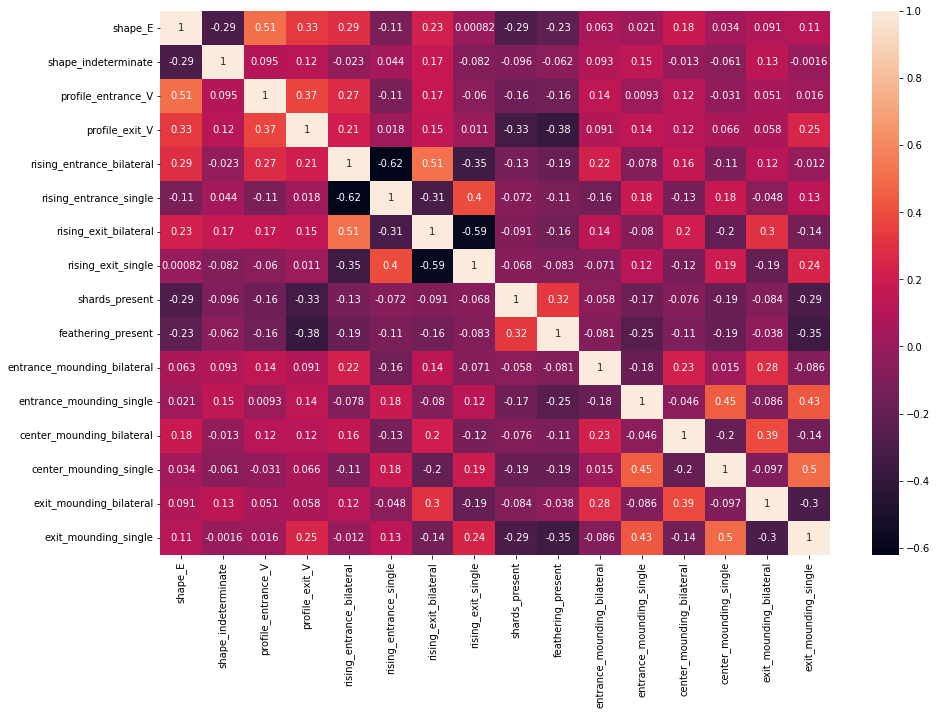

In [16]:
display_correlation_matrix(train_dataset_file, input_cols)